<a href="https://colab.research.google.com/github/NLovePink/MIT-IDSS-Data-Sci-Machine-Learning-Program/blob/main/Making_Sense_of_Unstructured_Data_Learner_lowcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls drive

MyDrive


In [ ]:
!ls drive/MyDrive/

'AI Movie Recs Demo!: Aug 5, 2021 5:34 PM.webm'
 appsheet
'APUSH Chapter 41 (Period 9)- Flippity.net Flashcards Template.gsheet'
'APUSH Chapters 7-9 (Period 3) - Flippity.net Flashcards Template.gsheet'
'A Study in Charlotte_ Title _ Author Questions (1).gsheet'
'A Study in Charlotte_ Trivia Questions.gsheet'
'Automobile (1).gsheet'
 Automobile.csv
 Automobile.gsheet
'Brewster Public Library Creative Writing Workshop Classwork Notebook #1.gdoc'
'Brewster Public Library Creative Writing Workshop Homework Notebook #1.gdoc'
'Business Presentation Template for Low Code Version - Customer Personality Segmentation.gslides'
'Chrome OS Cloud backup'
'Chrome Syncable FileSystem'
'Claim 2 (Projectiles) - Physics H.gsheet'
 Classroom
'Colab Notebooks'
'College Admissions Workshop Sessions'
'Copy of Flippity.net Flashcards Template.gsheet'
'Course_list_export_Pace University_ Westchester.gsheet'
 Data_Visualization_with_Python.ipynb
'Descripciones Fisicas - Flippity.net Flashcards Template.gsheet'

In [ ]:
!ls drive/MyDrive/'Colab Notebooks'

'Great Learning Unstructured Data'
'MIT Cheat Sheet.ipynb'
'Natasha L - [AI+X] Student_Optional_PythonBasics.ipynb'
'Natasha L - Data_Visualization_Student.ipynb'
'Natasha L - Student_Numerical_Data_Preprocessing.ipynb'
'Natasha L - Student_Simple_Model_Metrics.ipynb'
'Student Mental Healthy Psych.ipynb'


In [ ]:
!ls drive/MyDrive/'Colab Notebooks'/'Great Learning Unstructured Data'

'marketing_campaign - marketing_campaign.csv'


In [ ]:
!ls drive/MyDrive/'Colab Notebooks'/'Great Learning Unstructured Data'/'marketing_campaign - marketing_campaign.csv'

'drive/MyDrive/Colab Notebooks/Great Learning Unstructured Data/marketing_campaign - marketing_campaign.csv'


In [ ]:
# loading data into a pandas dataframe via drag and drop method
# data = pd.read_csv("/content/marketing_campaign - marketing_campaign.csv")
# loading data into a pandas dataframe via mounting g drive
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Great Learning Unstructured Data/marketing_campaign - marketing_campaign.csv')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
# creating a copy of the data
data = data.copy()

## **Data Overview**

#### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
data.tail(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

#### Calculating the age of the customer using the "Year Birth"

In [ ]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age of the customer
data['Age'] = current_year - data['Year_Birth']

In [ ]:
data.shape

(2240, 30)

- The dataset has 2240 rows and 30 columns.

#### **Question 1**: What are the data types of all the columns?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# Get the summary statistics of the numerical data
data.describe() ## Write the appropriate function to print the statitical summary of the data

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response          Age  
count  2240.000000  2240.000000  
mean      0.149107    56.194196  
std       0.356274    11.98406

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Checking for missing values in the data
data.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

### Dropping columns which are irrelevant to our analysis.

In [ ]:
columns_to_drop = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
data.drop(columns=columns_to_drop, inplace=True)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
data.shape

(2240, 18)

#### PLotting the histogram of each column.

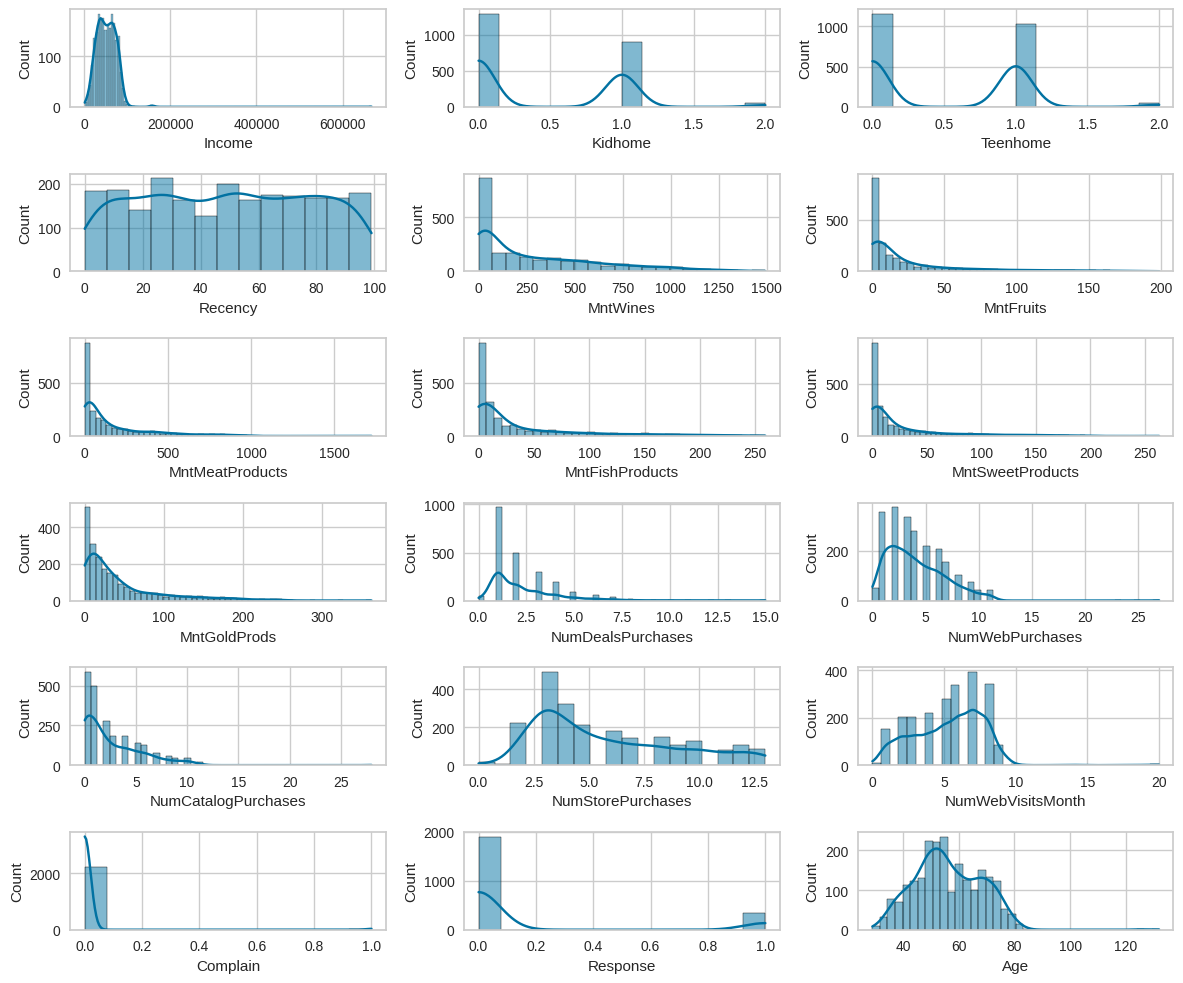

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

for i, feature in enumerate(data.columns): #iterating through each column
    plt.subplot(6, 3, i+1)                  # assign a subplot in the main plot
    sns.histplot(data = data, x = feature, kde = True)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

#### PLotting the boxplot of each column.

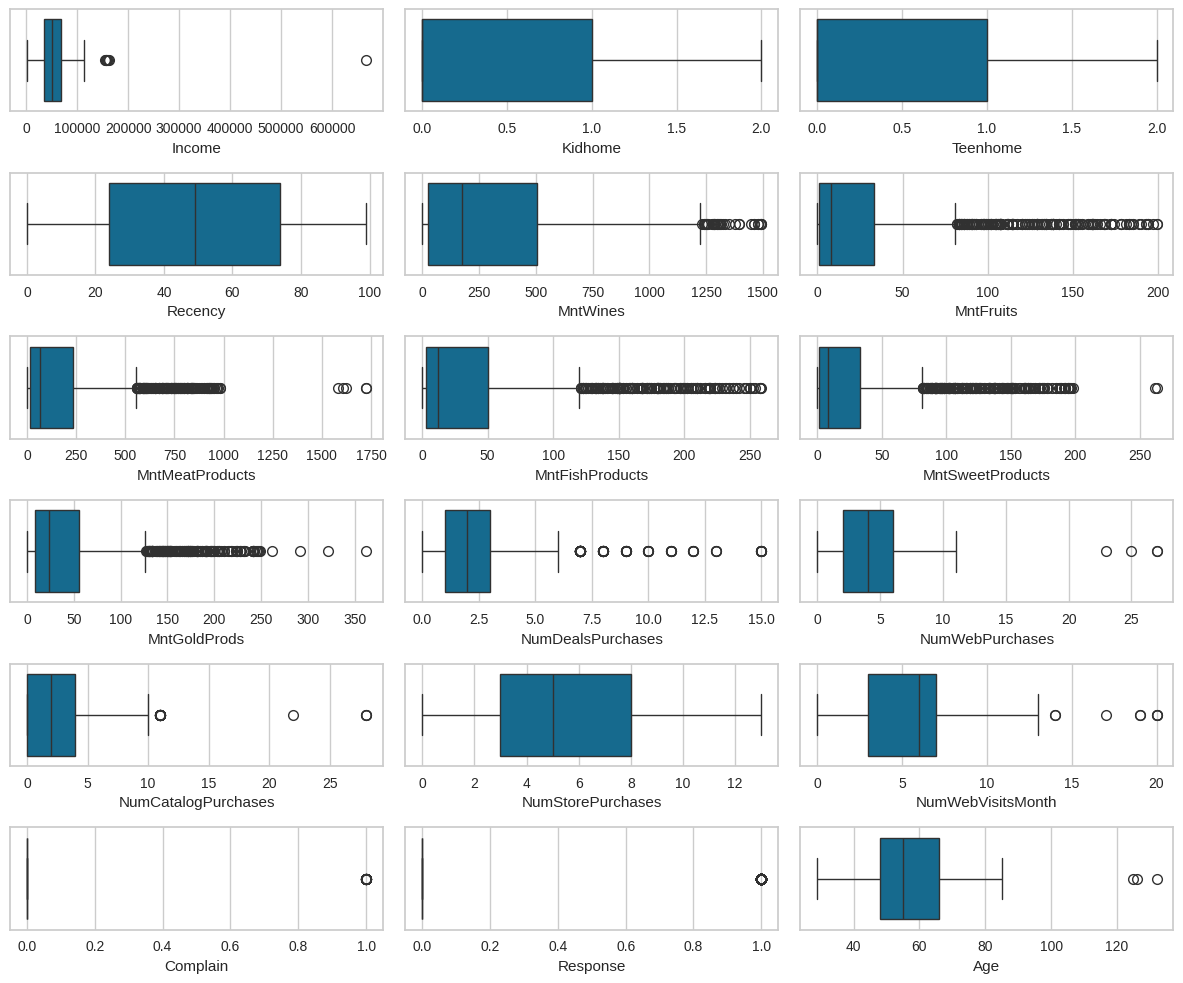

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns):    # iterating through each column
    plt.subplot(6, 3, i+1)                     # assign a subplot in the main plot
    sns.boxplot(data = data, x = feature)    # plot the boxplot

plt.tight_layout();   # to add spacing between plots

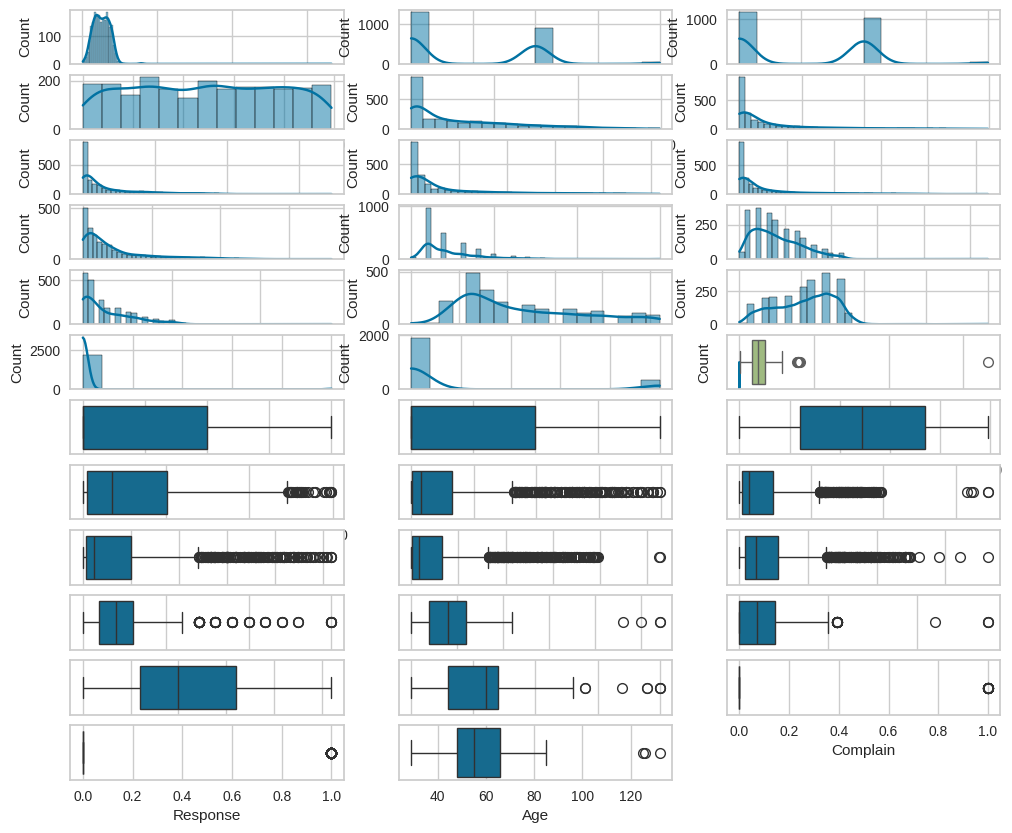

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

for i, feature in enumerate(data.columns): #iterating through each column
    plt.subplot(12, 3, i+1)                  # assign a subplot in the main plot
    sns.histplot(data = data, x = feature, kde = True)    # plot the histogram

for item, feature in enumerate(data.columns):    # iterating through each column
    plt.subplot(12, 3, item+18)                     # assign a subplot in the main plot
    sns.boxplot(data = data, x = feature)    # plot the boxplot

plt.plot();   # to add spacing between plots

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

**Let's check for correlations.**

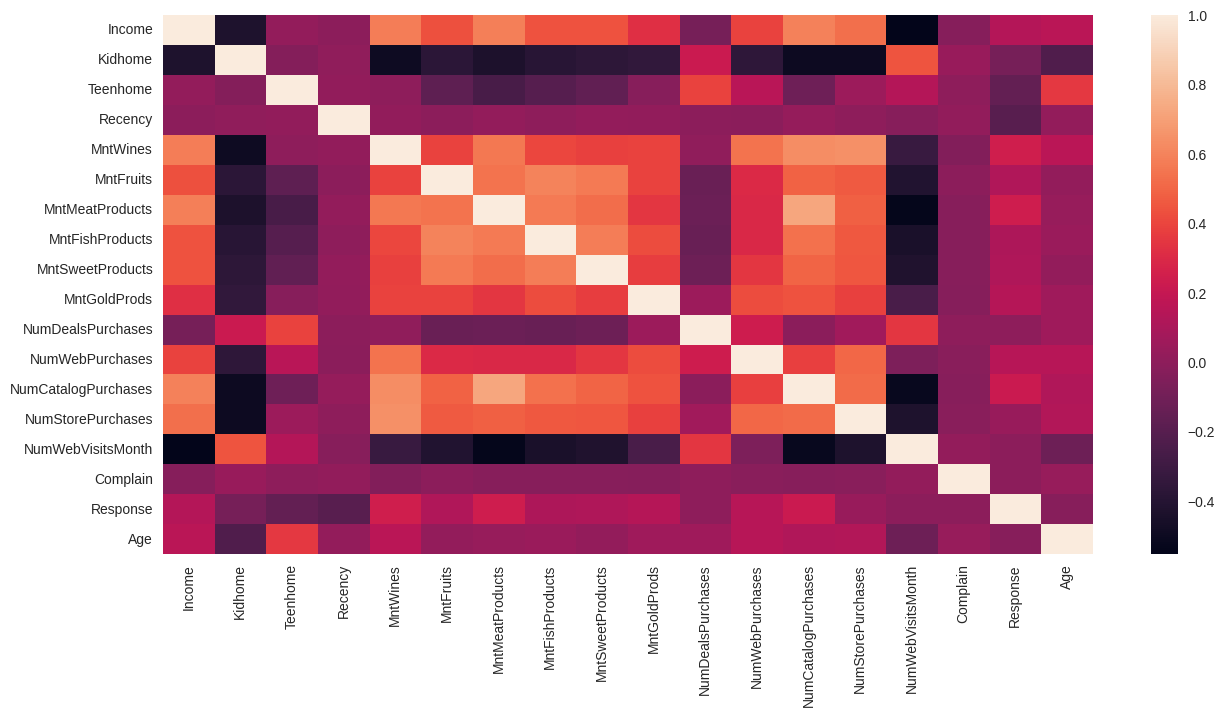

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr())
plt.show()

**Let's check for pairplots.**

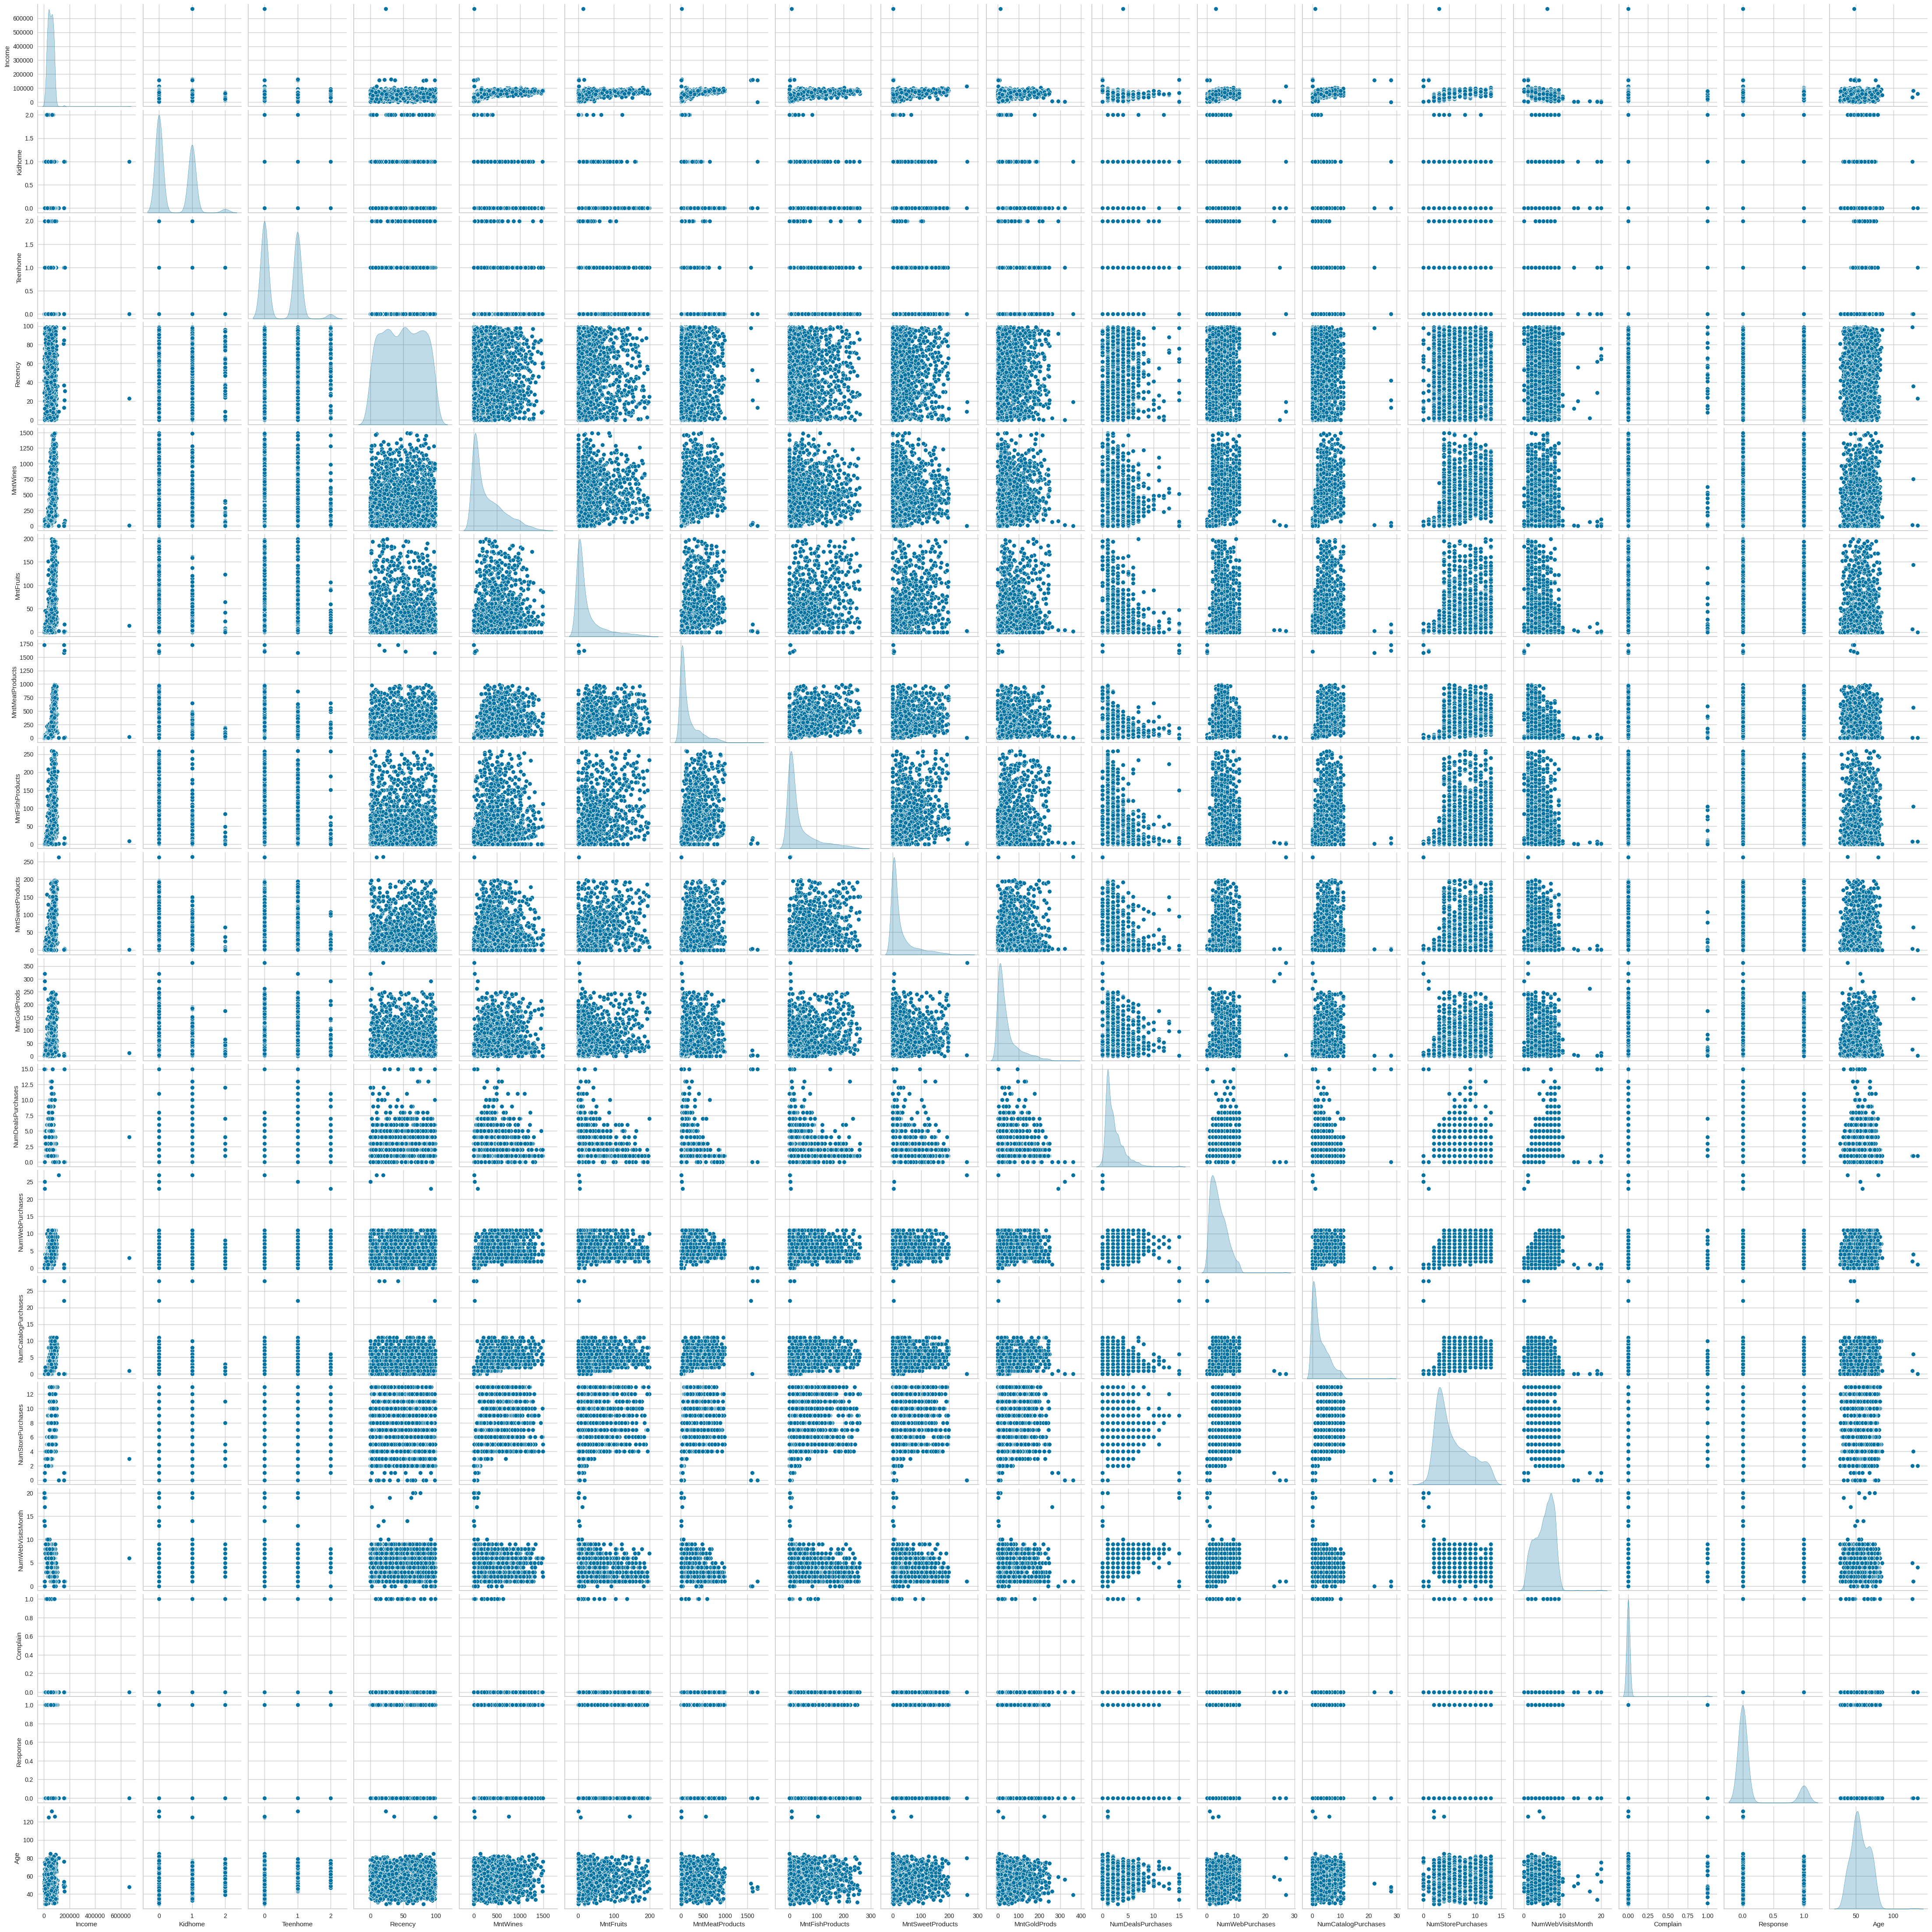

In [ ]:
sns.pairplot(data = data, diag_kind="kde")
plt.show()

## **Data Preprocessing**

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

## **K-means Clustering**

In [ ]:
k_means_data = subset_scaled_data.copy() # Do not change this code. This will be used later in cluster profiling

#Can't do K means analysis in code cell below **due to the missing values in *Income* feature column**. Therefore, we will drop the *Income* feature from the scaled DataFrame 'k_means_data'.

In [ ]:
k_means_data = k_means_data.drop('Income', axis=1)

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2 	WCSS: 28153.36715874643
Number of Clusters: 3 	WCSS: 25032.74354165087
Number of Clusters: 4 	WCSS: 23995.0370289025
Number of Clusters: 5 	WCSS: 22655.496006074336
Number of Clusters: 6 	WCSS: 21827.363879833523
Number of Clusters: 7 	WCSS: 20996.12149509553
Number of Clusters: 8 	WCSS: 19402.393654734235
Number of Clusters: 9 	WCSS: 18232.34527654227
Number of Clusters: 10 	WCSS: 17633.31963405836


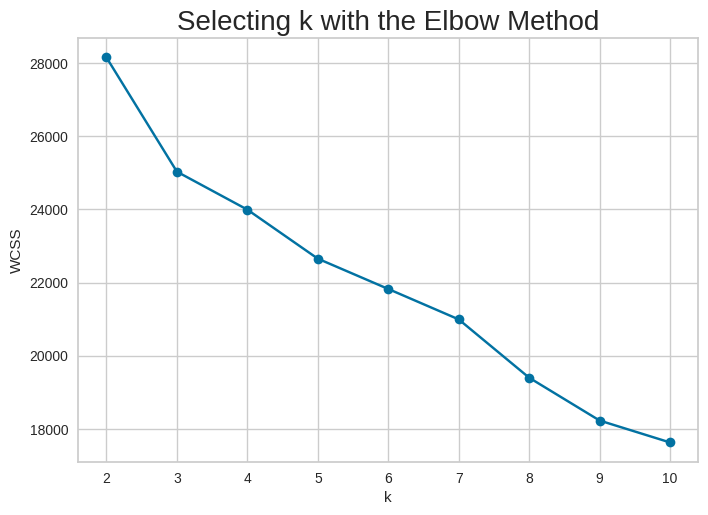

In [ ]:
clusters = range(2, 11)
wcss_k8 = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state=1) # initialize the kmeans model
    model.fit(k_means_data) # fit the kmeans model on the scaled data.
    wcss = model.inertia_
    wcss_k8.append(wcss)

    print("Number of Clusters:", k, "\tWCSS:",wcss)

plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)       # initialize the kmeans model with the number o clusters.
    preds = clusterer.fit_predict((k_means_data))                  # Fit the kmeans model
    score = silhouette_score(k_means_data, preds)             # Check the silhoutte score against the predictions
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.28196212336413556)
For n_clusters = 3, the silhouette score is 0.21482404256135612)
For n_clusters = 4, the silhouette score is 0.20346828610600146)
For n_clusters = 5, the silhouette score is 0.13797864952603678)
For n_clusters = 6, the silhouette score is 0.14458080012802554)
For n_clusters = 7, the silhouette score is 0.14797904820157456)
For n_clusters = 8, the silhouette score is 0.19642666031710643)
For n_clusters = 9, the silhouette score is 0.15413416443249733)


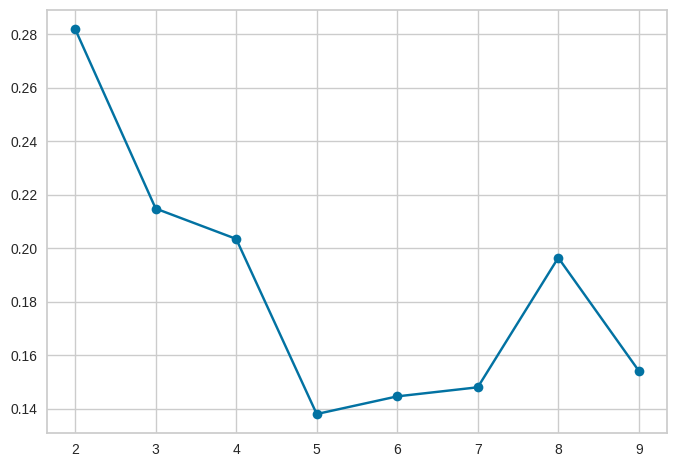

In [ ]:
plt.plot(cluster_list, sil_score, marker = 'o')
plt.show()

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
%%time
kmeans = KMeans(n_clusters = n_clusters, random_state=0)
kmeans.fit(k_means_data)

CPU times: user 19.2 ms, sys: 9.03 ms, total: 28.3 ms
Wall time: 17.2 ms


KMeans(n_clusters=9, random_state=0)

In [ ]:
# creating a copy of the original data
data1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["K_means_segments"] = kmeans.labels_
data1["K_means_segments"] = kmeans.labels_

## **Hierarchical Clustering**

In [ ]:
hc_data = k_means_data.copy()

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_data, metric = dm, method = lm) # Calculating the linkage with the distance metrics and linkage method.
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6434135707726854.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7286331995987333.
Cophenetic correlation for Euclidean distance and average linkage is 0.8404618772200584.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8271168355665546.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5639131047381097.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6348278391045958.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7501321642090168.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7524594659417886.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6432123879242045.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5465123400760904.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6803043339253687.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8404618772200584, which is obtained with Euclidean distance and average linkage.


#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?


**Let's view the dendrograms for the different linkage methods.**

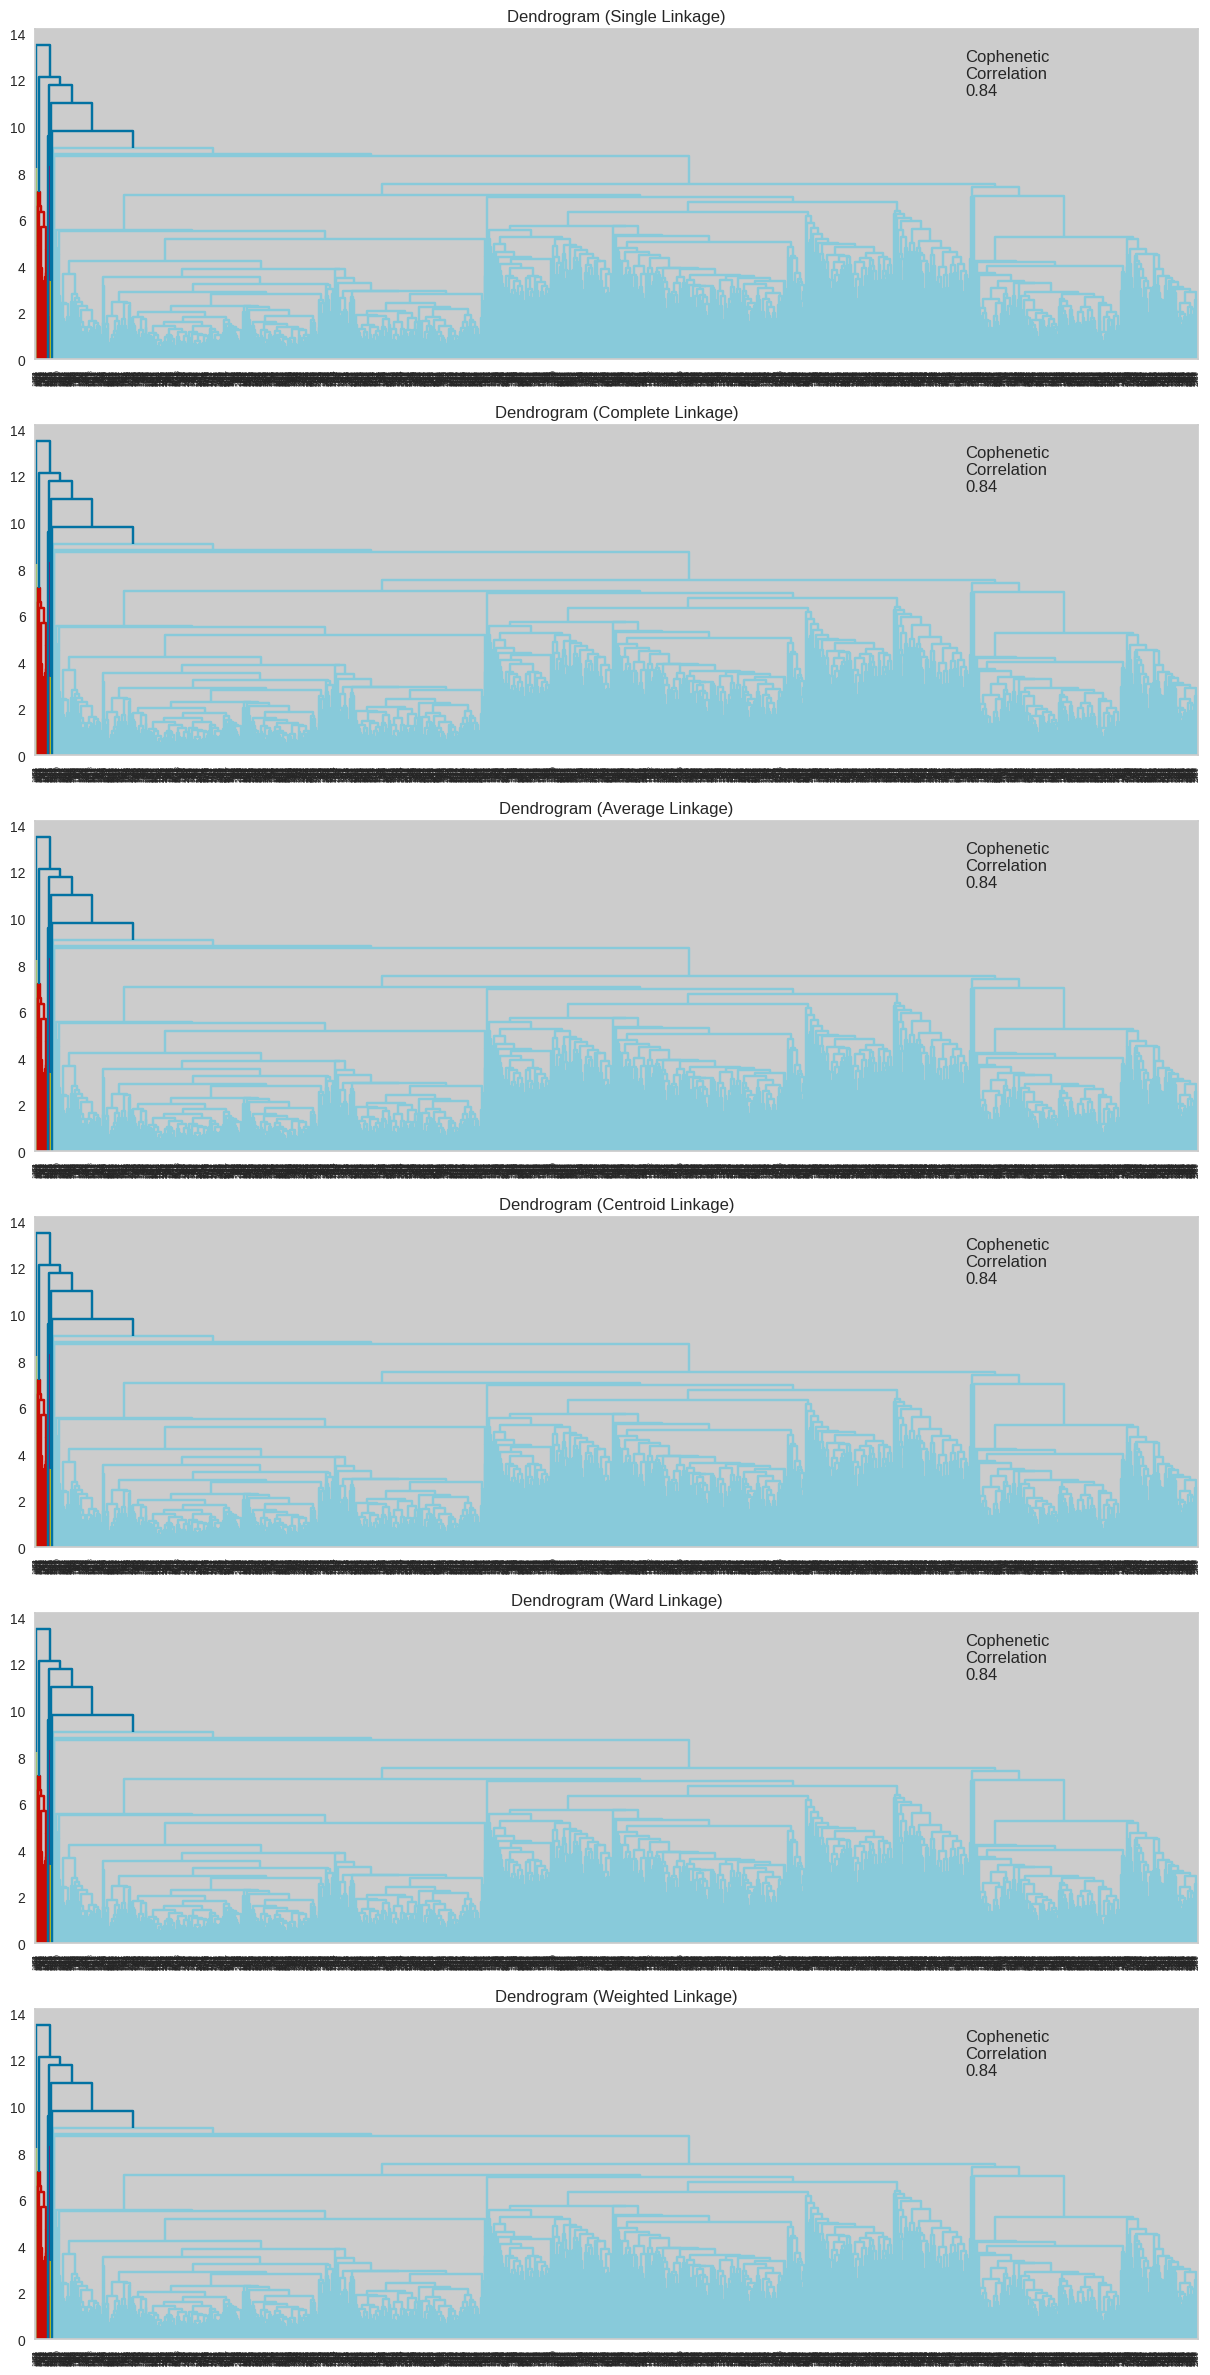

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):


    Z = linkage(hc_data, metric="euclidean", method= 'average') # Calculating the linkage with Euclidean distance and linkage method.

    dendrogram(Z, ax=axs[i])                            # Visualizing the Dendogram with the linkage


    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )


#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

In [ ]:
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters= n_clusters) # Initialize the model with the number of clusters.
    preds = clusterer.fit_predict((k_means_data))                # Fit the model on the scaled data to get the predictions.
    score = silhouette_score(hc_data, preds)               # Calculate the silhoutte score from the predictions.
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2703491373021742
For n_clusters = 3, silhouette score is 0.3217843263926741
For n_clusters = 4, silhouette score is 0.3067964917658073
For n_clusters = 5, silhouette score is 0.3201052603879835
For n_clusters = 6, silhouette score is 0.3126423003310419
For n_clusters = 7, silhouette score is 0.2609031925238421
For n_clusters = 8, silhouette score is 0.2663438964112309
For n_clusters = 9, silhouette score is 0.2689458666405889


#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=n_clusters, metric=dm, linkage='average') # Initialize the HC model with appropriate parameters.
HCmodel.fit(hc_data)

CPU times: user 188 ms, sys: 31 ms, total: 219 ms
Wall time: 205 ms


AgglomerativeClustering(linkage='average', metric='cityblock', n_clusters=9)

In [ ]:
# creating a copy of the original data
data2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = HCmodel.labels_
data2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_data.head()

Kidhome  Teenhome   Recency  MntWines  MntFruits  MntMeatProducts  \
0 -0.825218 -0.929894  0.307039  0.983781   1.551577         1.679702   
1  1.032559  0.906934 -0.383664 -0.870479  -0.636301        -0.713225   
2 -0.825218 -0.929894 -0.798086  0.362723   0.570804        -0.177032   
3  1.032559 -0.929894 -0.798086 -0.870479  -0.560857        -0.651187   
4  1.032559 -0.929894  1.550305 -0.389085   0.419916        -0.216914   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.462147          1.476500      0.843207           0.349414   
1        -0.650449         -0.631503     -0.729006          -0.168236   
2         1.345274         -0.146905     -0.038766          -0.685887   
3        -0.503974         -0.583043     -0.748179          -0.168236   
4         0.155164         -0.001525     -0.556446           1.384715   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.409304             2.510890          -0.550785           0.693904   
1        -1.110409            -0.568720          -1.166125          -0.130463   
2         1.409304            -0.226541           1.295237          -0.542647   
3        -0.750450            -0.910898          -0.550785           0.281720   
4         0.329427             0.115638           0.064556          -0.130463   

   Complain  Response       Age  K_means_segments  HC_segments  
0 -0.097282  2.388846  0.985345                 3            0  
1 -0.097282 -0.418612  1.235733                 0            3  
2 -0.097282 -0.418612  0.317643                 4            3  
3 -0.097282 -0.418612 -1.268149                 2            3  
4 -0.097282 -0.418612 -1.017761                 2            3

In [ ]:
data2.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  Response  Age  HC_segments  
0         0         1   68            0  
1         0         0   71            3  
2         0         0   60            3  
3         0         0   41            3  
4         0         0   44            3

In [ ]:
subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

**Let's create some plots on the original data to understand the customer distribution among the clusters in Kmeans.**

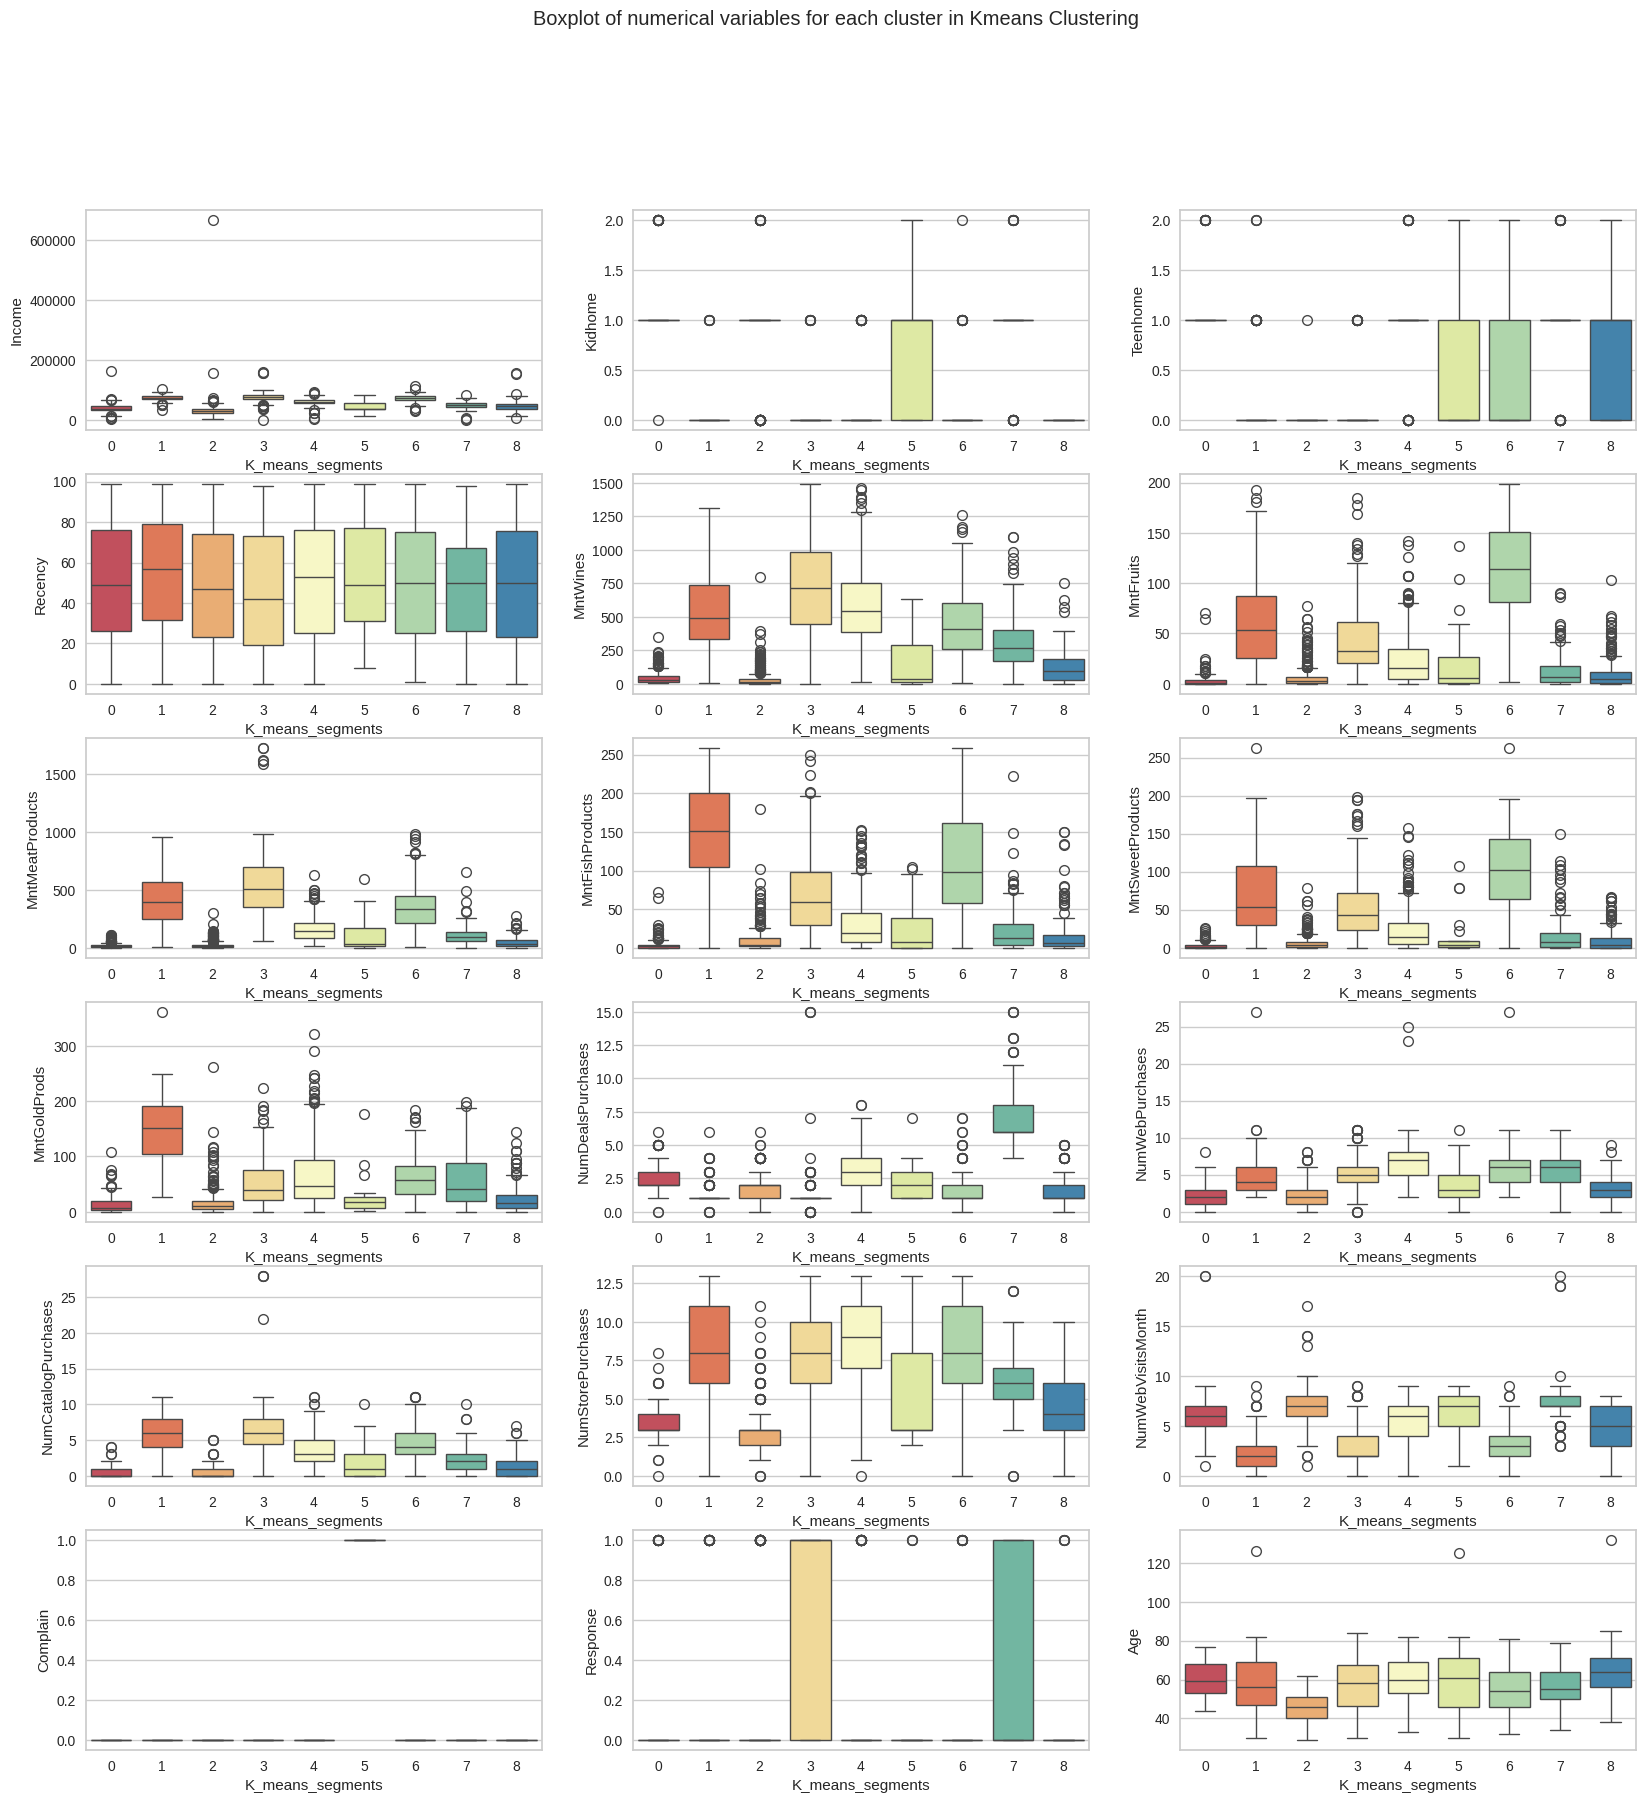

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data1, x = 'K_means_segments', y = variable, palette='Spectral') # Hint: X = clusters, Y = columns.

**Let's create some plots on the original data to understand the customer distribution among the clusters in HC.**

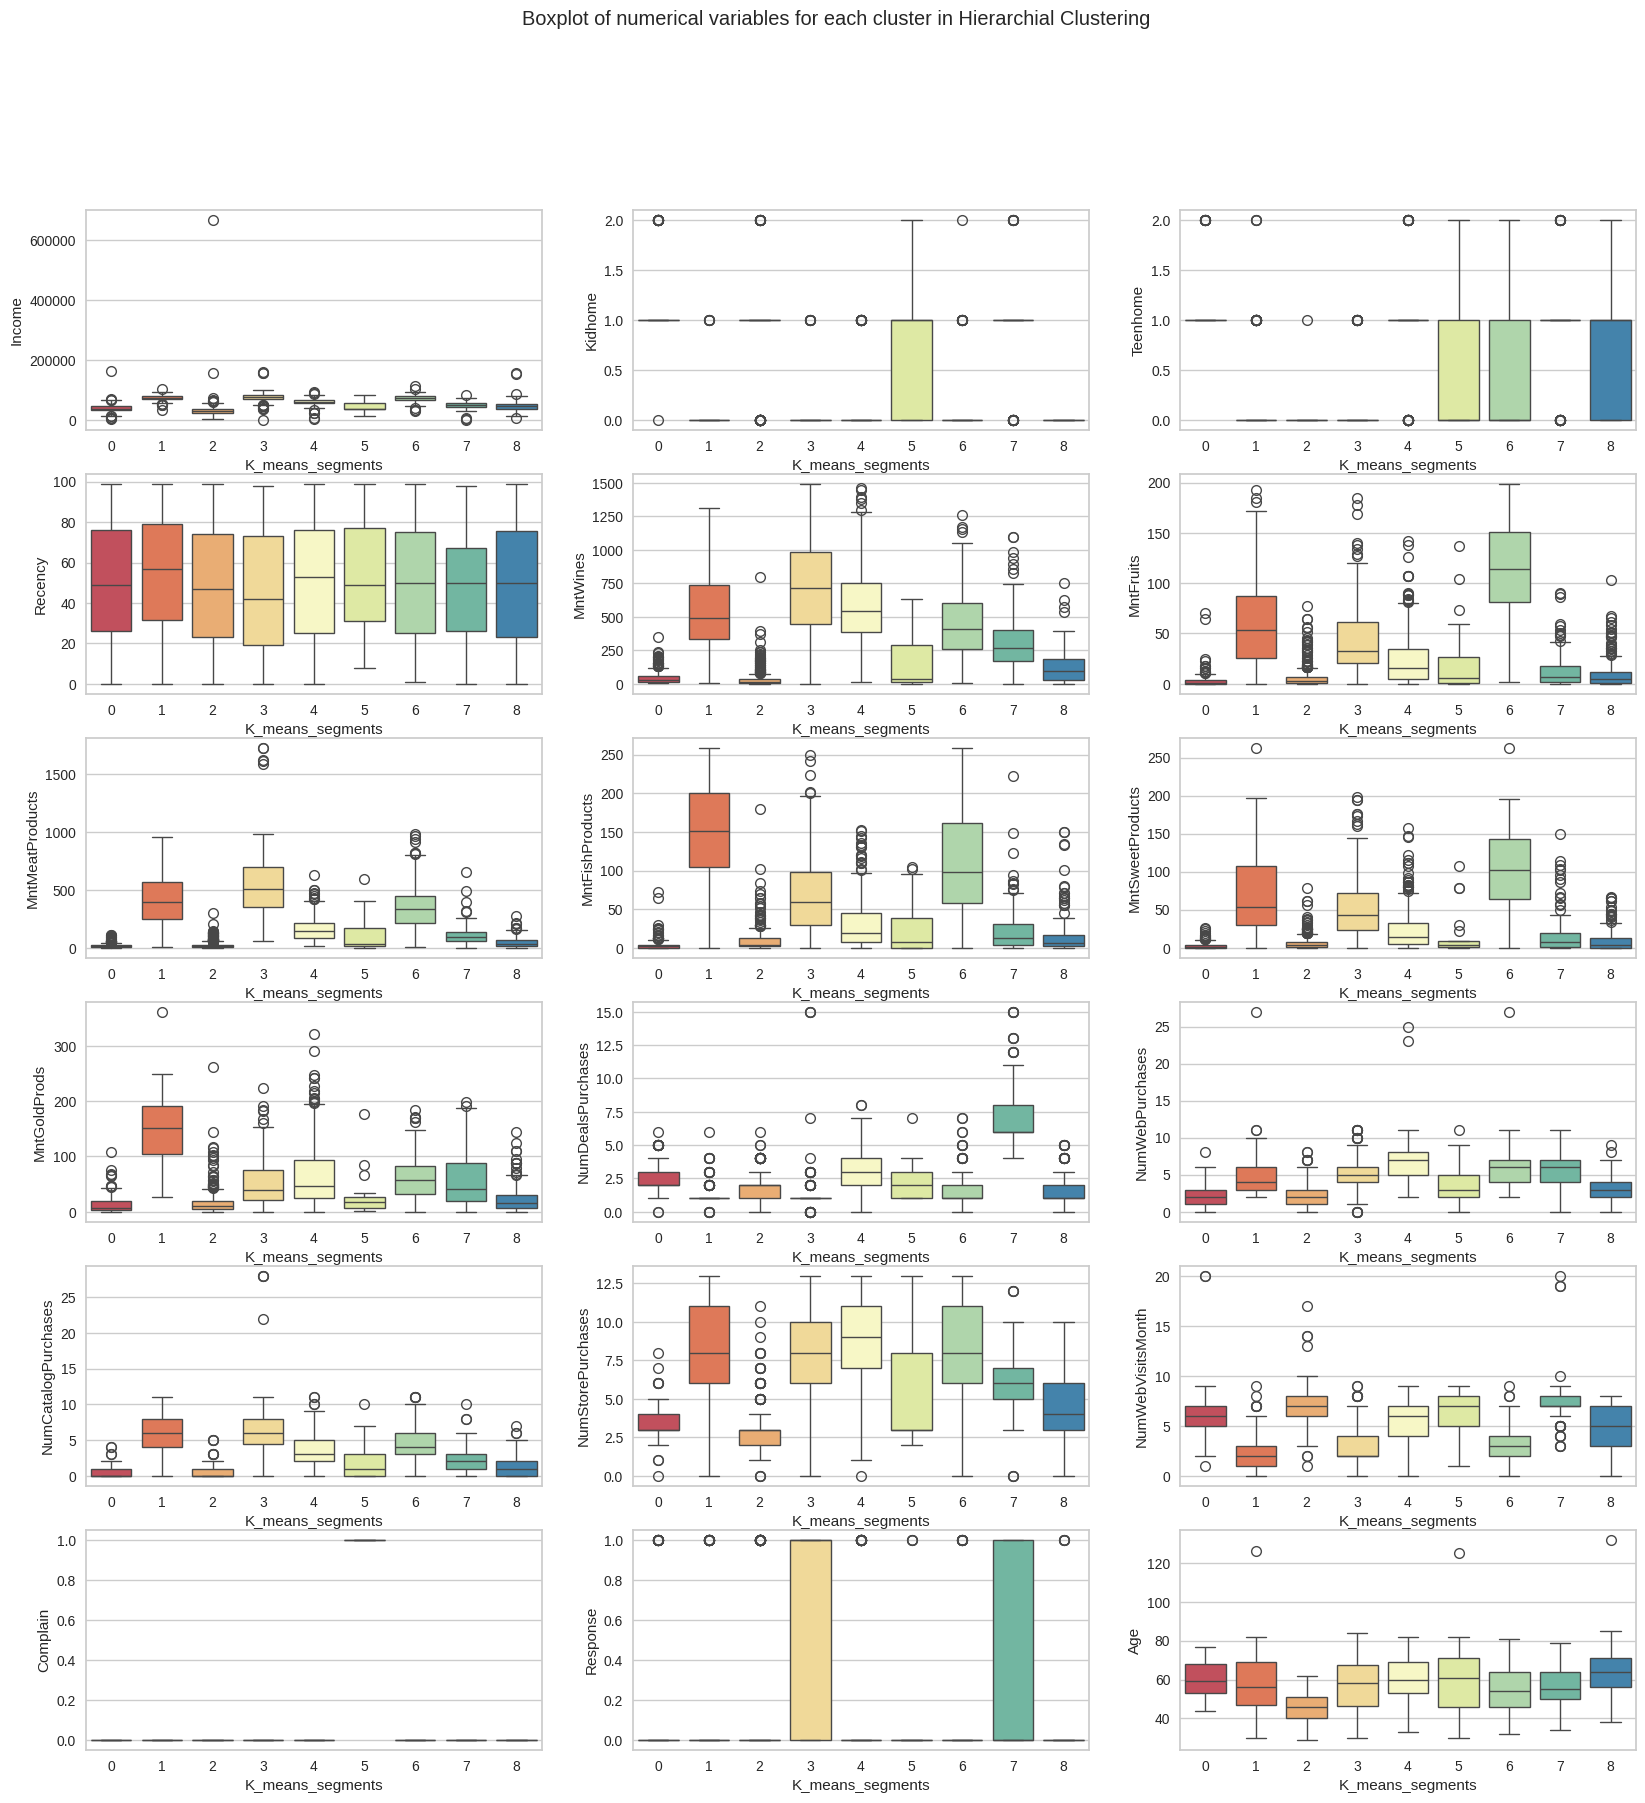

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Hierarchial Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data1, x = "K_means_segments", y = variable, palette='Spectral') # Hint: X = clusters, Y = columns.

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

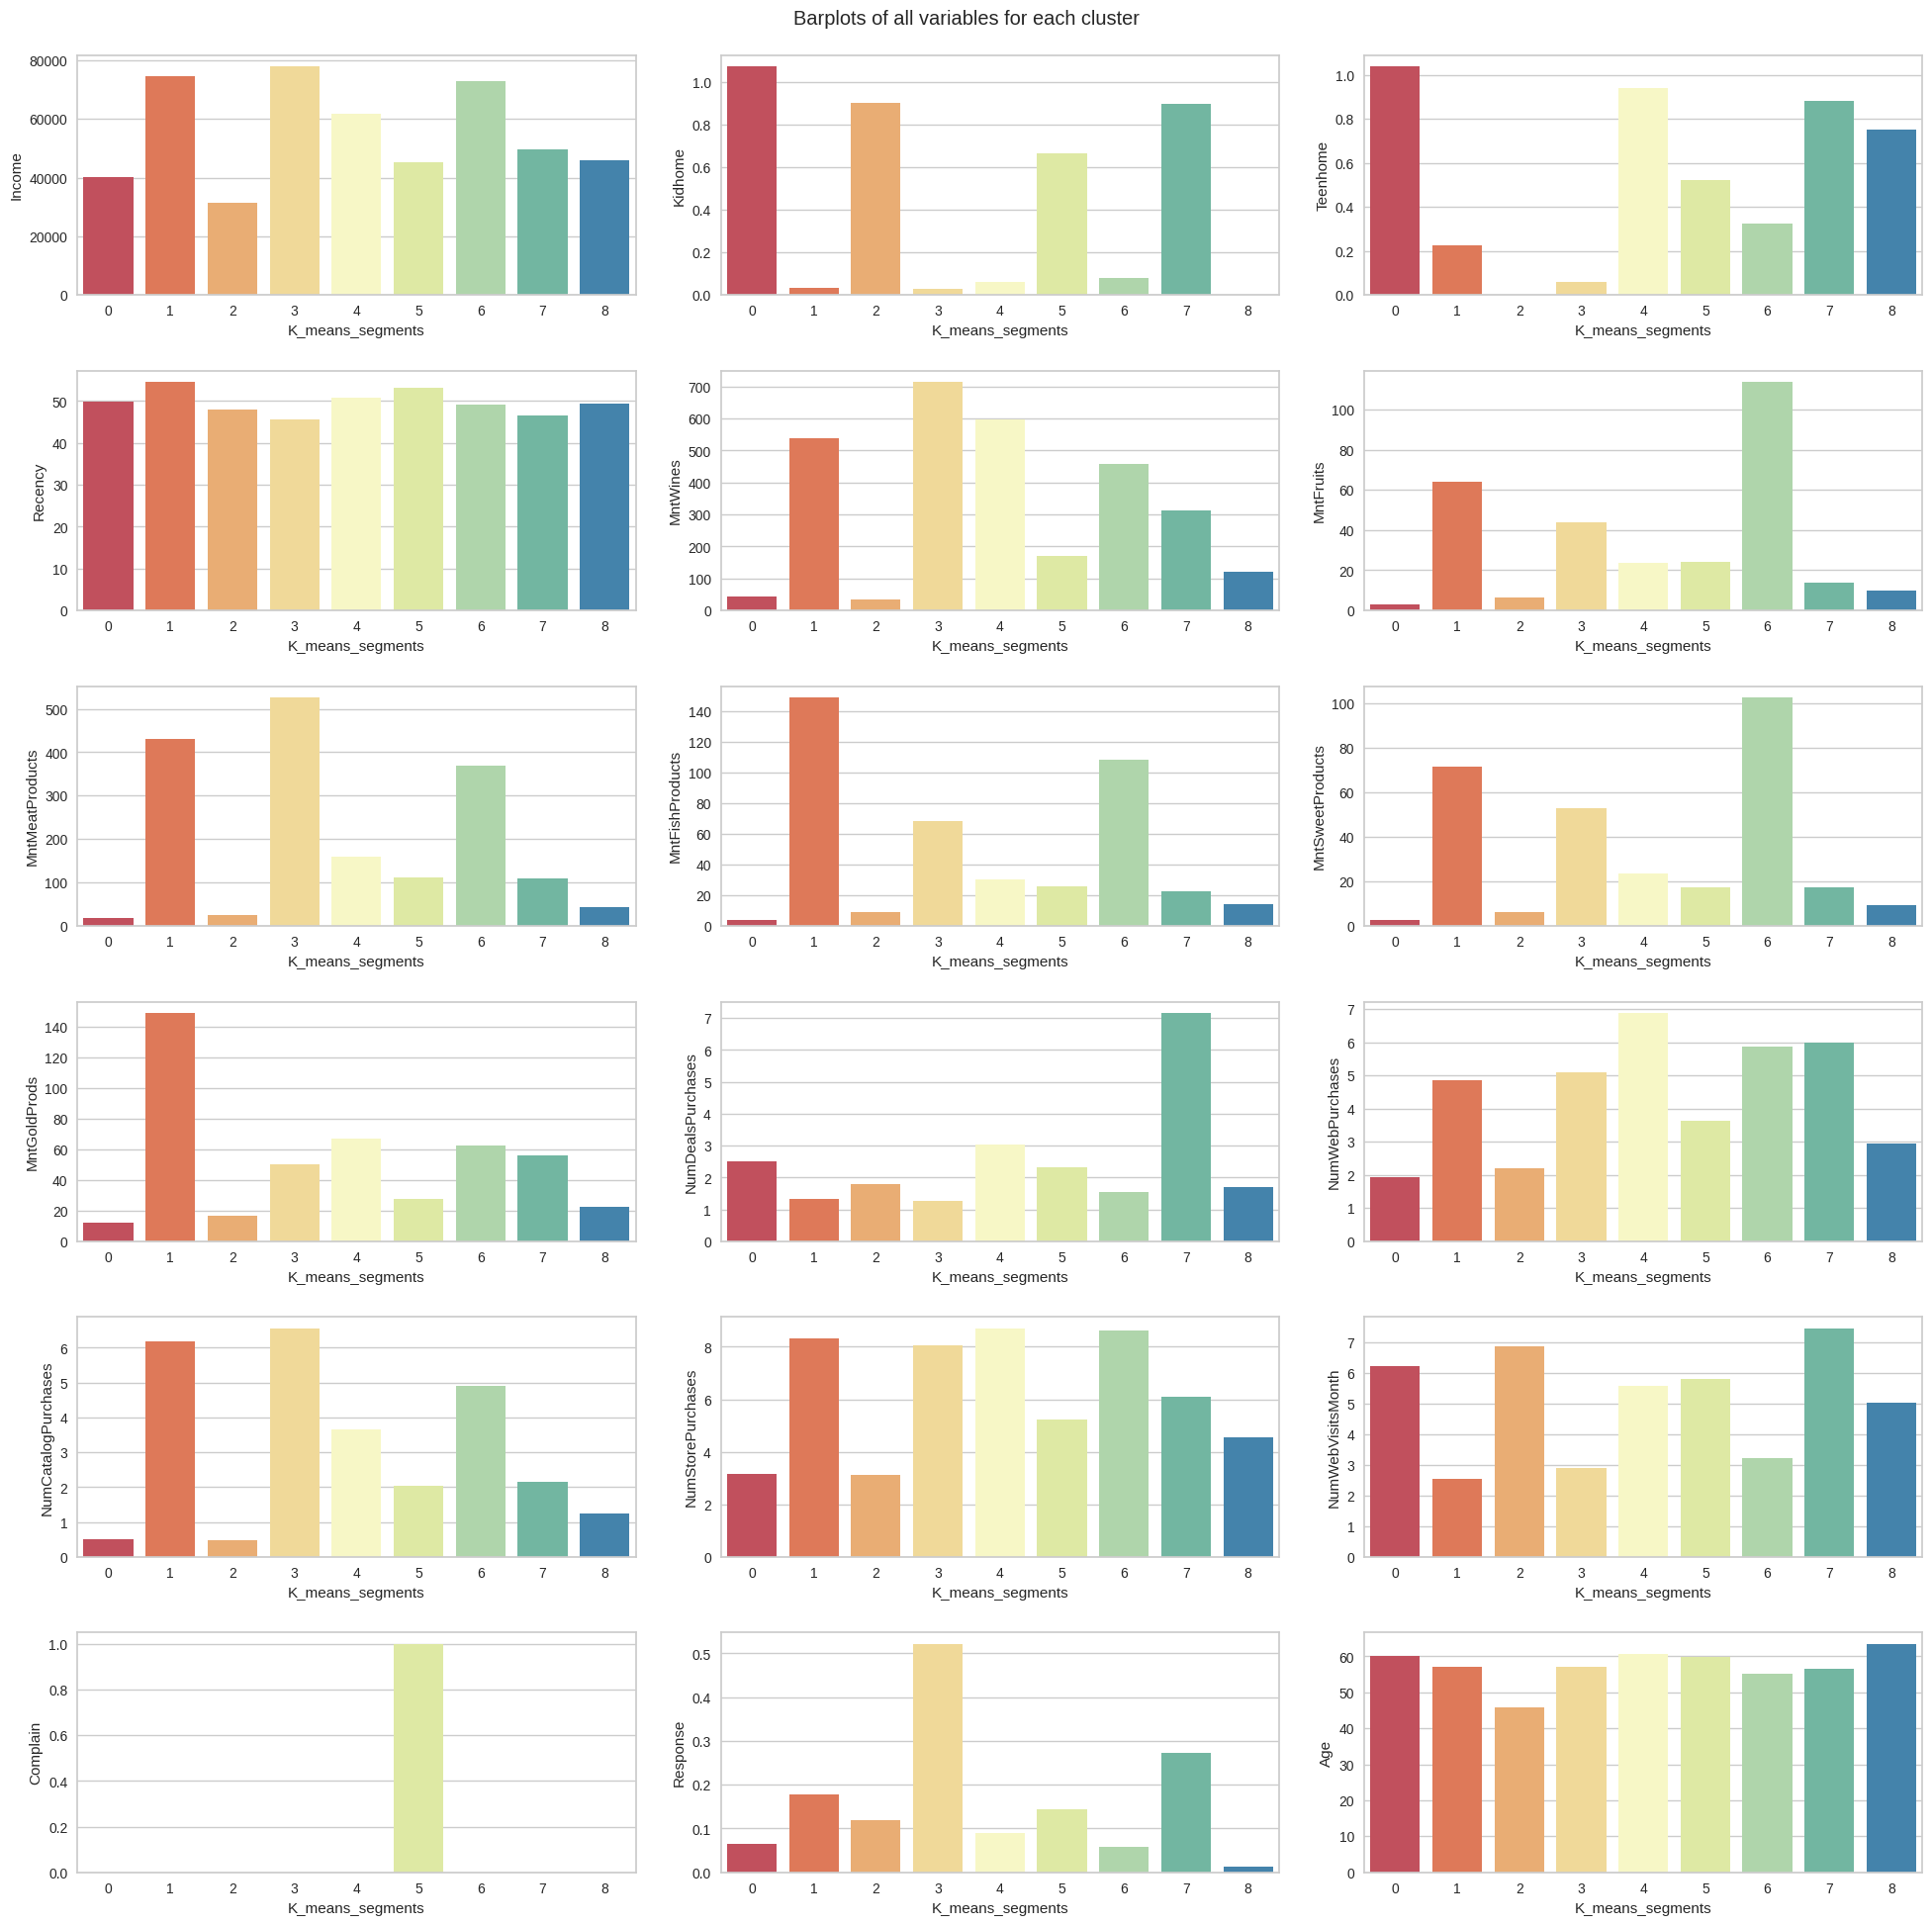

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=data1, x = "K_means_segments", y = variable, palette='Spectral', errorbar=None)

plt.tight_layout(pad=2.0)

## **Business Recommedations**

#### **Question 16**: Based on the cluster insights, what business recommendations can be provided?


- We have seen that 3 clusters are distinctly formed using both methodologies and the clusters are analogous to each other.
- Cluster 1 has premium customers with a high credit limit and more credit cards, indicating that they have more purchasing power. The customers in this group have a preference for online banking.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and a moderate number of credit cards.
- Cluster 2 has more overhead of customers calling in, and the bank may need to spend money on call centers.


Here are **5–7 actionable business recommendations** based on the cluster profiling:

---

### **1. Focus on Retaining High-Value Customers (Cluster 3)**
- **Offer Exclusive Loyalty Programs**: Provide tailored loyalty benefits, early access to products, and exclusive discounts to maintain engagement and drive repeat purchases.
- **Upsell and Cross-Sell**: Introduce premium products or bundles targeting their high spending patterns across product categories like wines, gold products, and meats.
- **Personalized Campaigns**: Use their high response rate to create personalized campaigns highlighting products they prefer.

---

### **2. Activate Potential in Moderate-Spending Customers (Cluster 2)**
- **Incentivize Higher Engagement**: Offer targeted discounts or special offers to encourage increased spending and purchases across channels.
- **Educate About Products**: Provide content (emails, guides, or social media) showcasing the value and uniqueness of products they don’t purchase frequently.
- **Improve Campaign Effectiveness**: Refine campaign messaging based on their moderate response rate to increase acceptance.

---

### **3. Reengage Low-Value Customers (Cluster 1)**
- **Win-Back Campaigns**: Implement campaigns specifically aimed at bringing back inactive customers, such as offering steep discounts or limited-time offers.
- **Understand Barriers to Engagement**: Conduct surveys or collect feedback to identify reasons for their low purchases and disengagement.
- **Promote Entry-Level Products**: Introduce affordable or trial-sized products to ease them into higher spending.

---

### **4. Convert Browsers into Buyers (Cluster 0)**
- **Optimize Website Experience**: Since Cluster 0 has high website visits but low spending, improve website navigation, showcase popular products, and streamline the checkout process.
- **Targeted Digital Campaigns**: Retarget these users with ads or emails featuring products they browsed but didn’t purchase.
- **Offer Online-Exclusive Discounts**: Provide web-only discounts or promotions to convert visits into purchases.

---

### **5. Strengthen Digital and Multi-Channel Strategies**
- **Seamless Omni-Channel Experience**: Ensure a consistent shopping experience across all channels (web, catalog, and store) to encourage cross-channel engagement, especially for Clusters 2 and 3.
- **Digital Campaigns for All Clusters**: Focus on targeted digital campaigns, particularly for Clusters 0 and 2, as they have moderate to high online engagement.

---

### **6. Develop Campaigns to Boost Responses**
- Use the insights from Clusters 2 and 3 (which show higher response rates) to refine campaign targeting and messaging. Emulate successful strategies used for Cluster 3 to increase responses across other segments.

---

### **7. Leverage Product-Specific Insights**
- Promote popular categories (e.g., wines, gold products) to high-value clusters, while running introductory campaigns for less-engaged clusters to familiarize them with premium products.

---

By focusing on these strategies, the company can enhance engagement, increase revenue, and strengthen customer loyalty across all clusters.